# MIS780 Advanced AI For Business - Assignment 2 - T2 2024

## Task Number: Business Problem Name

**Student Name:** _enter your full name here_

**Student ID:** _enter your student ID here_

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

The purpose of Task 2 is to develop an AI solution for automatic waste classification based on image data. This is especially important for businesses in the waste management and treatment sector, as it helps optimize the classification process, thereby increasing the recycling rate and minimizing labor costs. The provided dataset consists of 2,864 real-world images of 6 different waste types: cardboard, glass, metal, paper, plastic, and vegetation.

To solve this problem, we applied deep learning techniques, specifically Convolutional Neural Networks (CNNs), due to their superior ability to extract spatial features from images. First, the data was preprocessed, including pixel value normalization and splitting the data into two parts: 70% for training and 30% for testing. Next, CNN models with different architectures were built and trained to find the best performing model.

The final results show that the model achieved 70.12% accuracy on the test set and a Kappa Score of 0.642. This shows a relatively good agreement between the model's prediction and the actual label. However, when analyzed in detail, the classification performance for glass waste was the lowest, which may be due to the similarity in image features between glass and other types of waste such as metal and plastic.

Although this result is quite promising, there is still room for further improvement. Specifically, by using data augmentation techniques and further optimizing the model architecture, the classification accuracy of the system can be further improved. Ultimately, if this system is implemented in practice, it will help businesses not only reduce operating costs but also increase recycling productivity, thereby promoting sustainable development goals.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

Data Preprocessing in the automatic waste classification problem is an extremely important step to ensure that the input data is properly prepared, helping the deep learning model to best exploit the features from the image. This process includes many data preparation steps, from loading and analyzing the images to normalizing and labeling the data. Each step plays an important role in ensuring the highest performance of the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# to show the folders under the dataset
!ls "/content/drive/MyDrive/Colab Notebooks/Part2_WasteImages"

Cardboard  Glass  Metal  Paper	Plastic  Vegetation


First, image files are loaded and analyzed from folders, each representing a different type of waste. With a total of 2,864 images, organizing and analyzing the folder structure not only makes it easier to manage the data but also ensures consistency in preprocessing. For example, dividing the images into folders corresponding to waste types such as cardboard, glass, metal, paper, plastic, and vegetation makes it easy for the model to identify each specific label for each image.

In [4]:
import os

# Define a dictionary to store the folder paths with names matching the original variable names
folder_paths = {
    'cardboard_path': '/content/drive/MyDrive/Colab Notebooks/Part2_WasteImages/Cardboard',
    'glass_path': '/content/drive/MyDrive/Colab Notebooks/Part2_WasteImages/Glass',
    'metal_path': '/content/drive/MyDrive/Colab Notebooks/Part2_WasteImages/Metal',
    'paper_path': '/content/drive/MyDrive/Colab Notebooks/Part2_WasteImages/Paper',
    'plastic_path': '/content/drive/MyDrive/Colab Notebooks/Part2_WasteImages/Plastic',
    'vegetation_path': '/content/drive/MyDrive/Colab Notebooks/Part2_WasteImages/Vegetation'
}

# Initialize a dictionary to hold file lists
file_lists_task2 = {}

# Loop through each folder and retrieve the list of files
for folder_name, path in folder_paths.items():
    file_list = os.listdir(path)
    file_lists_task2[folder_name] = file_list
    print(f'Total number of files under {folder_name.replace("_path", "")} folder are: {len(file_list)}')


Total number of files under cardboard folder are: 461
Total number of files under glass folder are: 420
Total number of files under metal folder are: 547
Total number of files under paper folder are: 500
Total number of files under plastic folder are: 500
Total number of files under vegetation folder are: 436


Next, to ensure that the model can process the images efficiently, the size of the images is normalized to 50x50 pixels. This is important in reducing computational complexity, as larger images can lead to excessive resource consumption without providing much additional benefit. However, this size is still enough to retain important image features that help the model recognize objects in the image. Normalizing the size helps create consistent inputs for the deep learning model, thereby ensuring a smooth training process.

Next, a labeling process is performed, in which images from each folder are assigned labels corresponding to their waste type. This is an important step because it helps the model understand which type of waste the input data belongs to, and thus learn the features associated with each type. For example, images from the "glass" folder will be labeled as "glass", ensuring classification accuracy.

In [6]:
import tensorflow as tf

# Create a list to store the image data and labels
image_data2 = []

# Iterate through each folder and process the images
for folder_name, path in folder_paths.items():
    label = folder_name.replace('_path', '')  # Assign the label based on the folder name
    for file in os.listdir(path):
        # Check if the file is a jpeg or jpg file
        if file.endswith('.jpeg') or file.endswith('.jpg'):
            # Load the image data from the file using TensorFlow
            img = tf.io.read_file(os.path.join(path, file))
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, (50, 50))
            # Add the image data and label to the data list
            image_data2.append((img, label))

print(f'Total images processed: {len(image_data2)}')

Total images processed: 2864


Next, the data is split into two parts: 70% for training and 30% for testing. This proportional split ensures that there is enough data to train the model while still having a large enough test set to evaluate the model’s performance on previously unseen data. This is important in the waste classification problem, as the system will need to generalize well on untrained waste types.

In [8]:
# Randomly shuffle the entire dataset to ensure randomness in splitting
random.shuffle(image_data2)

# Split the dataset into 70% training and 30% testing sets
split_index = int(len(image_data2) * 0.7)  # Calculate the index to split at 70%
data2_train = image_data2[:split_index]  # Select the first 70% for training
data2_test = image_data2[split_index:]   # Select the remaining 30% for testing


Finally, the data preparation for the machine learning model is performed by separating the image and label data from the training and testing sets. The data is then converted into NumPy arrays, which optimizes the computation process and is compatible with deep learning libraries such as TensorFlow or Keras. The main purpose of these steps is to ensure that the input data is properly formatted so that the model can learn and evaluate effectively.

In [9]:
# Separate the image data and labels from the training set
x_task2_train, y_task2_train = zip(*data2_train)

# Separate the image data and labels from the testing set
x_task2_test, y_task2_test = zip(*data2_test)

# Convert the extracted image data and labels into NumPy arrays for training
x_task2_train = np.array(x_task2_train)
y_task2_train = np.array(y_task2_train)

# Convert the extracted image data and labels into NumPy arrays for testing
x_task2_test = np.array(x_task2_test)
y_task2_test = np.array(y_task2_test)


<a id = "cell_model"></a>
## 3. Predictive Modeling

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets.*

In [10]:
# Cast image data to 32-bit floating point in a single step and normalize by dividing by 255
x_task2_train = (x_task2_train / 255).astype('float32')
x_task2_test = (x_task2_test / 255).astype('float32')

# Display the shapes of the training and testing matrices in one step
print(f"Training matrix shape: {x_task2_train.shape}")
print(f"Testing matrix shape: {x_task2_test.shape}")


Training matrix shape: (2004, 50, 50, 3)
Testing matrix shape: (860, 50, 50, 3)


In [11]:
import numpy as np

# Display the original class format of the first element in the training dataset
print(f'Original category label for the first element in the training set: {y_task2_train[0]}\n')

# Create a NumPy array of waste categories
categories = np.array(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'vegetation'])

# Create a mapping from category strings to integer labels
cat_map_task2 = {category: idx for idx, category in enumerate(categories)}

# Encode the category labels into integer values
y_task2_train = np.array([cat_map_task2[category] for category in y_task2_train])
y_task2_test = np.array([cat_map_task2[category] for category in y_task2_test])

# Display the encoded format of the first element in the training dataset
print(f'Encoded integer label for the first element in the training set: {y_task2_train[0]}')


Original category label for the first element in the training set: vegetation

Encoded integer label for the first element in the training set: 5


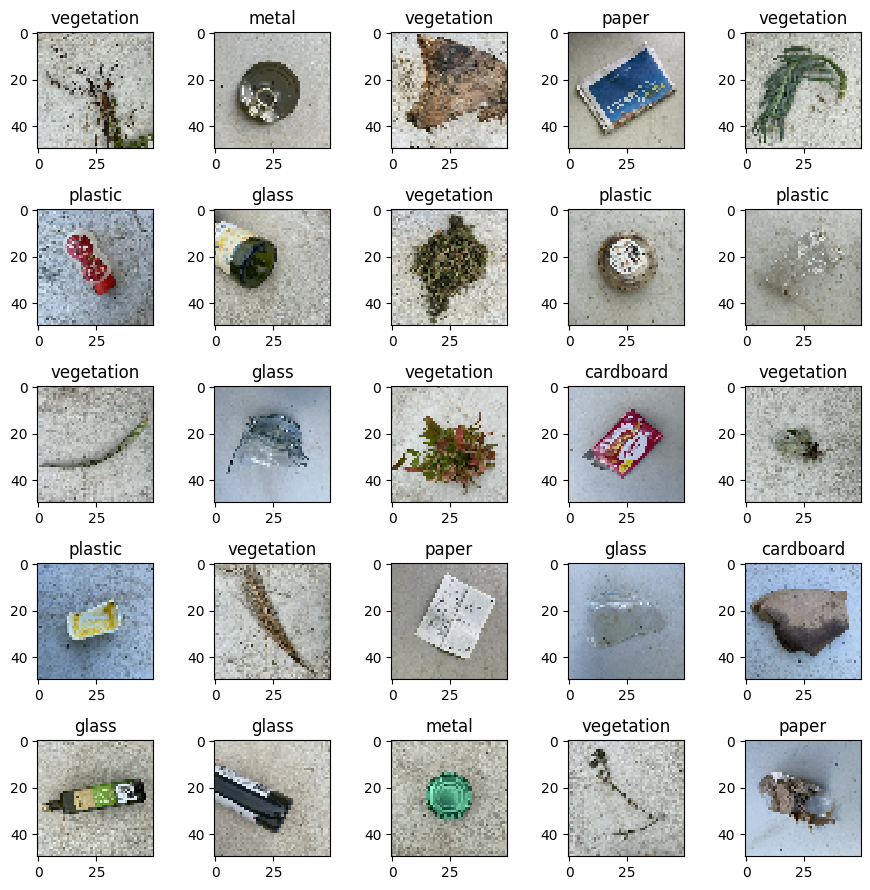

In [12]:
import matplotlib.pyplot as plt

# Set the default size for all plots in the program
plt.rcParams['figure.figsize'] = (9, 9)

# List of labels corresponding to the waste categories
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'vegetation']

# Loop to display 25 images from the training set
for i in range(25):
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid for displaying images
    plt.imshow(x_task2_train[i], interpolation='none')  # Display an image from the training set
    plt.title(f"{labels[int(y_task2_train[i])]}")  # Set the title based on the label
plt.tight_layout()  # Ensure the plots do not overlap
plt.show()  # Display the plot


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers

In [18]:
# Number of waste classification categories: 6 (cardboard, glass, metal, paper, plastic, vegetation)
class_num = 6

# Build the CNN model for waste classification
def waste_classification_model():
    model = Sequential()

    # Layer 1: Convolutional layer with 32 filters, 3x3 kernel, ReLU activation
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2: Convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    model.add(Conv2D(256, kernel_size=(7, 7), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.2))  # Dropout for regularization

    # Flatten the layers to transition to fully connected layers
    model.add(Flatten())

    # Fully connected layer with 128 units and ReLU activation
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))  # Dropout for regularization

    # Output layer with 6 units (one for each class), softmax activation for classification
    model.add(Dense(class_num, activation='softmax'))

    # Compile the model using Adam optimizer and sparse categorical cross-entropy for integer labels
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()  # Display the model architecture
    return model

# Initialize the CNN model
model = waste_classification_model()

# Train the model on the training data
history = model.fit(x_task2_train, y_task2_train, batch_size=64, epochs=30, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_task2_test, y_task2_test, verbose=2)
print('\nTest accuracy:', test_acc)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,970,566 (15.15 MB)

 Trainable params: 3,970,566 (15.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 132s 5s/step - accuracy: 0.1803 - loss: 2.0121 - val_accuracy: 0.2893 - val_loss: 1.6821
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.3120 - loss: 1.6512 - val_accuracy: 0.3815 - val_loss: 1.5695
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.4020 - loss: 1.4905 - val_accuracy: 0.3217 - val_loss: 1.4960
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.4419 - loss: 1.3795 - val_accuracy: 0.4589 - val_loss: 1.2845
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.4952 - loss: 1.2922 - val_accuracy: 0.3815 - val_loss: 1.6018
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.5241 - loss: 1.2416 - val_accuracy: 0.5486 - val_loss: 1.1479
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.5952 - loss: 1.0668 - val_accuracy: 0.5810 - val_loss: 1.0792
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 122s 5s/step - accuracy: 0.6244 - loss: 1.0002 - val_accuracy: 0.6234 - v

In [19]:
# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(x_task2_train, y_task2_train, verbose=0)
print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_acc:.4f}\n')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_task2_test, y_task2_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')


Training Loss: 0.3863
Training Accuracy: 0.8728

Test Loss: 0.9036
Test Accuracy: 0.6965


27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 619ms/step
Cohen Kappa Score: 0.635


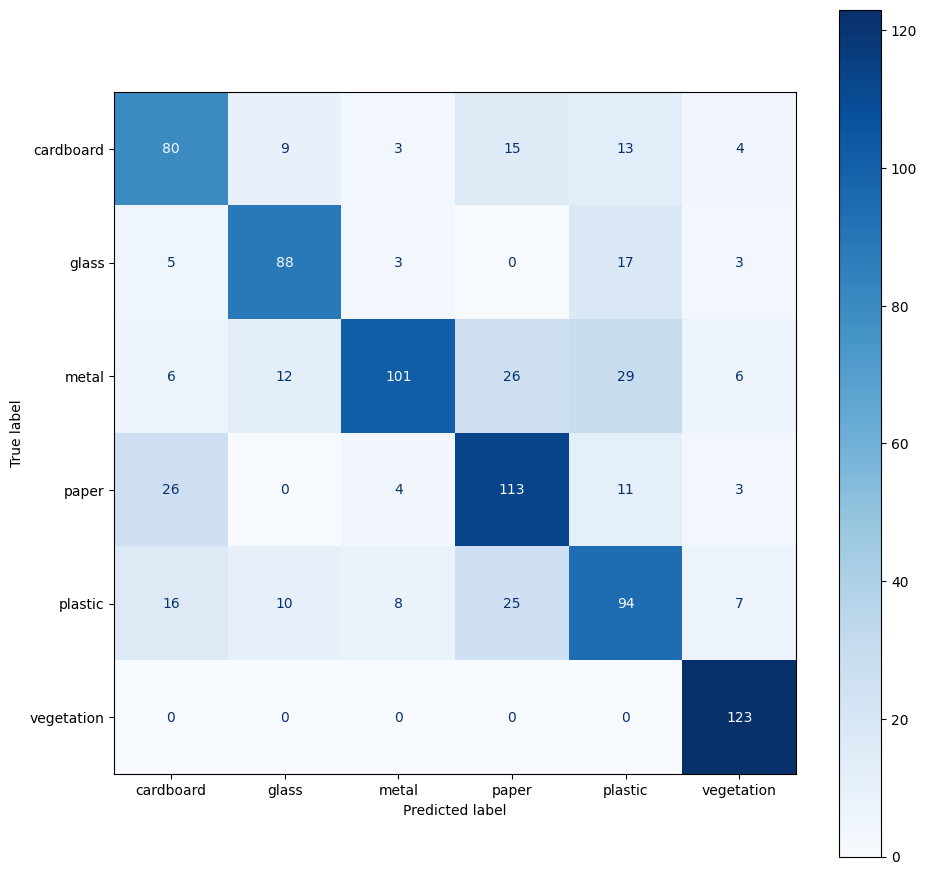

In [20]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_task2_pred = model.predict(x_task2_test)
y_task2_pred_multiclass = np.argmax(y_task2_pred, axis=1)  # Convert predictions to multiclass labels
y_task2_test_multiclass = y_task2_test  # True labels remain unchanged

# Calculate Cohen Kappa Score
kappa_score = cohen_kappa_score(y_task2_test_multiclass, y_task2_pred_multiclass)
print(f"Cohen Kappa Score: {kappa_score:.3f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_task2_test_multiclass, y_task2_pred_multiclass)

# Plot confusion matrix with a custom colormap
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'vegetation']
fig, ax = plt.subplots(figsize=(11, 11))  # Create a figure for better control over size
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)

# Apply a custom colormap (e.g., 'Blues')
disp.plot(ax=ax, cmap='Blues')

plt.show()


<a id = "cell_report"></a>
## 4. Experiments Report

*Provide a summary of experimental results, explain the meaning of your result
and how your model can be used to address the related business problem.*